 In this exercise we will use the Cancer Data from the  UCI Machine Learnining Repository (Asuncion and Newman, 2007). The Dataset consists of several hundered cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are.

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
from tqdm import tqdm

This function calculates the train and test accuracy of a model

In [35]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

This function creates a graph of training accuracy vs how many estimators (Decision Trees) a BaggingClassifier uses


In [42]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    #Iterate through different number of estimators and average out the results  


    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))
     #average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            #Iterate through different number of estimators and average out the results   
        
            Bag= BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
          
            
             
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
           
            
            
  
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
        
        
        
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()
    
   

In [7]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Let's remove rows that have a '?' in the BareNuc Column

In [8]:
df = df[df['BareNuc'] != '?']

Let's define the X and y of our dataset.

In [13]:
X = df.drop(['Class'], axis=1)
y = df['Class']



(683,)

Split the data into training and testing data (80/20) split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 10) (546,)
Test set: (137, 10) (137,)


Determine the best parameters for `n_estimators` and the `max_depth` of the `base_estimator` usig `GridSearchCV`

In [30]:
from sklearn.model_selection import GridSearchCV

We can use GridSearch for Exhaustive search over specified parameter values. To  alter the base  model; we add the double underscore and the attribute value:

Here we are searching odd numbers from 1 to 39 for `n_estimators` and odd numbers from 1 to 20 for `max_depth` in the `base_estimator`

In [31]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'estimator__max_depth' : [2*n+1 for n in range(10) ] }

Create a `BaggingClassifier` object called `Bag` with the `base_estimator` set to a `DecisionTreeClassifier` object where `random_state` = 0 and `bootstrap` = True


In [25]:
Bag = BaggingClassifier(estimator = DecisionTreeClassifier(), random_state=0, bootstrap=True)

In [32]:
search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)

In [33]:
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'estimator__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                                  19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [36]:
search.best_score_

0.9652014652014652

In [37]:
search.best_params_

{'estimator__max_depth': 5, 'n_estimators': 9}

In [38]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9635036496350365, 'train Accuracy': 0.9871794871794872}


  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [05:31<00:00, 16.58s/it]


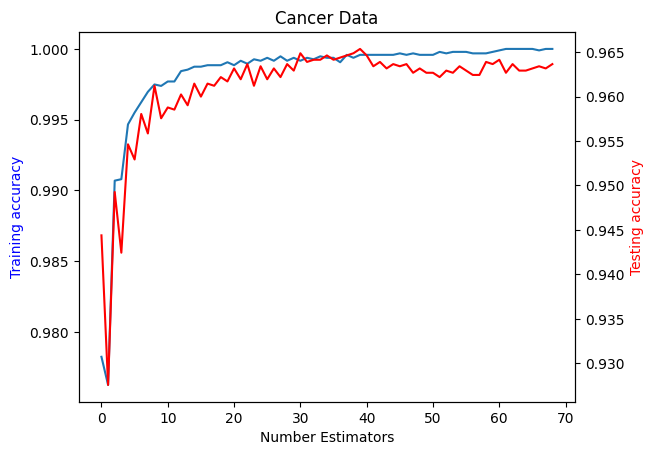

In [43]:
get_accuracy_bag(X, y, "Cancer Data")